Importing Required Libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


Loading the data set

In [19]:
Diabaetes_Dataset = pd.read_csv("diabetes.csv") #loading the diabetes dataset to a pandas DataFrame


In [20]:
Diabaetes_Dataset.head() #first five rows of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
Diabaetes_Dataset.shape #number of rows and columns in the dataset

(768, 9)

In [22]:
Diabaetes_Dataset['Outcome'].value_counts() #number of people having diabetes and not having diabetes   

Outcome
0    500
1    268
Name: count, dtype: int64

Checking for missing data

<Axes: >

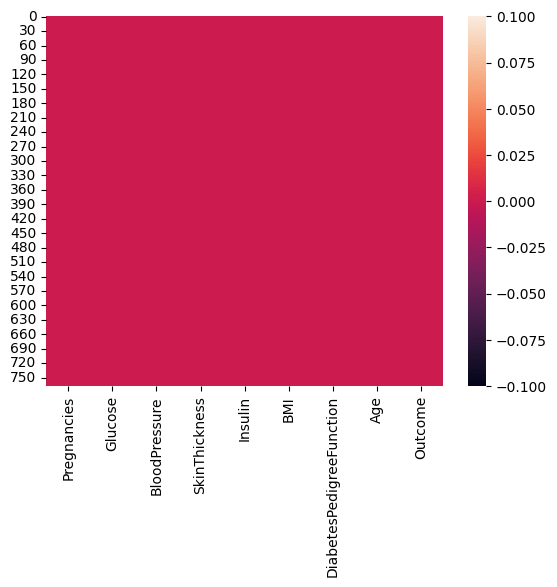

In [23]:
sns.heatmap(Diabaetes_Dataset.isnull()) #checking for missing values in the dataset


Co-relation Matrix

<Axes: >

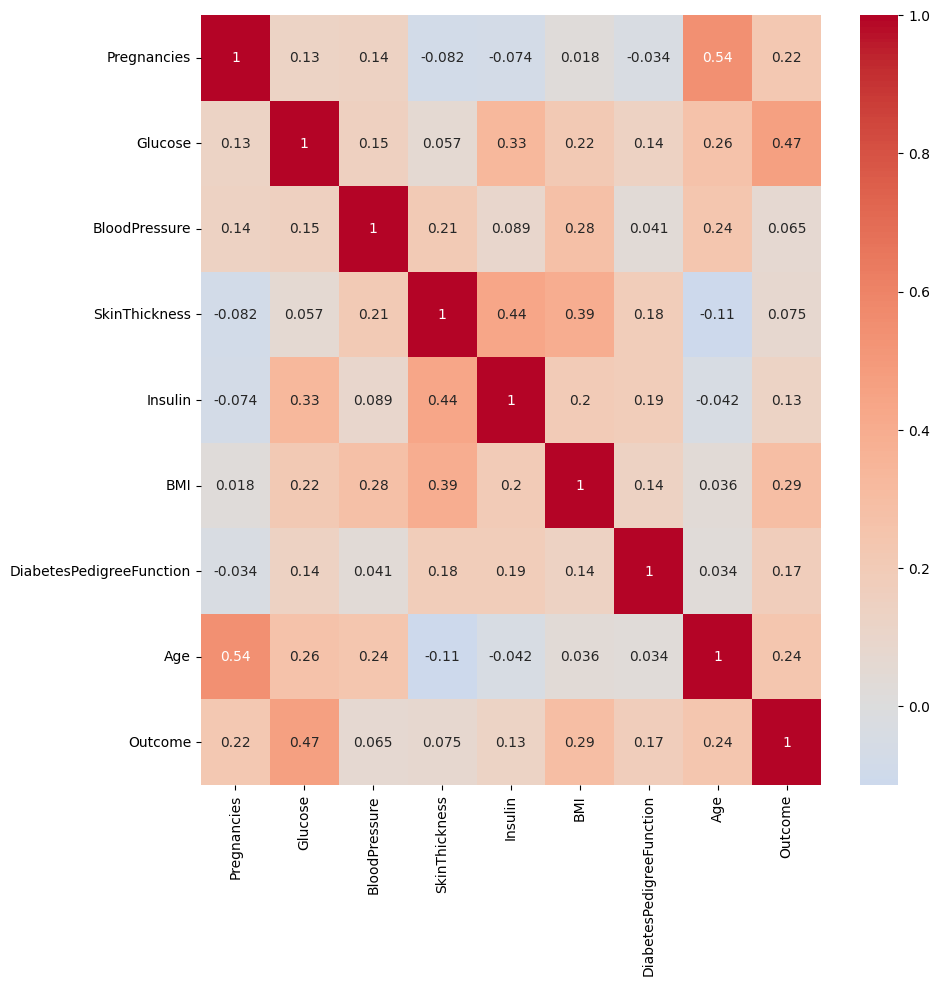

In [24]:
correlation = Diabaetes_Dataset.corr() #finding the correlation between the columns in the dataset
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)

Data Standardization

In [53]:
X = Diabaetes_Dataset.drop(columns='Outcome').values   #separating the data and labels
print(type(X))
scaler = StandardScaler()                               #scaling the data
scaler.fit(X)                                           #fitting the data to the scaler
standardized_data = scaler.transform(X)                 #transforming the data
X = standardized_data
print(type(X))
Y = Diabaetes_Dataset['Outcome']                        #labels


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [54]:
print(type(X))
print(X)

<class 'numpy.ndarray'>
[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [44]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train and Test data

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2) #splitting the data into training and testing data

Train Data

In [46]:
model = svm.SVC(kernel='linear') #using support vector machine model with linear kernel
model.fit(X_train, Y_train)      #training the model with training data


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Model Evaluation

Accuracy Score

In [47]:
X_train_prediction = model.predict(X_train) #predicting on training data
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) #accuracy on training data
print("Accuracy on training data : ", training_data_accuracy)

Accuracy on training data :  0.7866449511400652


In [48]:
X_test_prediction = model.predict(X_test) #predicting on testing data
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test) #accuracy on testing data
print("Accuracy on testing data : ", testing_data_accuracy)

Accuracy on testing data :  0.7727272727272727


Making a Predictive System

In [55]:
input_data = (5,166,72,19,175,25.8,0.587,51) #input data for prediction
input_data_as_numpy_array = np.asarray(input_data) #converting the input data to numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) #reshape the data as we are predicting for one instance
std_data = scaler.transform(input_data_reshaped) #scaling the input data
prediction = model.predict(std_data) #making prediction
print(prediction)
if (prediction[0] == 0):
    print("The person is not diabetic") 
else:
    print("The person is diabetic")

[1]
The person is diabetic


c:\Users\nalin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
